In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pan
import scipy.stats.mstats as ms
import statsmodels.api as sm

In [8]:
df=pan.read_csv("https://math.univ-lyon1.fr/~dabrowski/nutriage.csv",sep="\t")

In [9]:
#1.1
#the  cafe : quantitatives discrete
#taille, poids, age quantitatives continues
#sexe, viande, poisson, matgras : qualitatives (les trois derniÃ¨res ont un ordre "naturel",
# on dit qu'elles sont ordinales)

In [10]:
#1.2
df['sexe']=df['sexe'].astype('category')
df['sexe'].cat.categories=["Femme","Homme"]  #une liste avec les noms voulus pour les caractères de la variable
print(df)

      sexe  the  cafe  taille  poids  age  viande  poisson  matgras
0    Femme    0     0     151     58   72       4        3        6
1    Femme    1     1     162     60   68       5        2        4
2    Femme    0     4     162     75   78       3        1        4
3    Femme    0     0     154     45   91       0        4        2
4    Femme    2     1     154     50   65       5        3        2
..     ...  ...   ...     ...    ...  ...     ...      ...      ...
221  Femme    0     1     160     73   74       4        3        6
222  Femme    0     3     163     62   68       4        3        3
223  Homme    0     2     170     74   71       4        3        3
224  Femme    0     2     154     45   77       4        3        5
225  Femme    2     0     159     63   69       3        3        4

[226 rows x 9 columns]


In [15]:
#Poisson
df['poisson']=df['poisson'].astype('category')
df['poisson'].cat.categories

freq=["jamais","<1/sem.","1/sem.","2-3/sem.","4-6/sem.","1/jour"] #on crÃ©e une liste avec les noms de niveaux
df['poisson'].cat.categories=freq
print(df)


      sexe  the  cafe  taille  poids  age viande   poisson  matgras
0    Femme    0     0     151     58   72      4  2-3/sem.        6
1    Femme    1     1     162     60   68      5    1/sem.        4
2    Femme    0     4     162     75   78      3   <1/sem.        4
3    Femme    0     0     154     45   91      0  4-6/sem.        2
4    Femme    2     1     154     50   65      5  2-3/sem.        2
..     ...  ...   ...     ...    ...  ...    ...       ...      ...
221  Femme    0     1     160     73   74      4  2-3/sem.        6
222  Femme    0     3     163     62   68      4  2-3/sem.        3
223  Homme    0     2     170     74   71      4  2-3/sem.        3
224  Femme    0     2     154     45   77      4  2-3/sem.        5
225  Femme    2     0     159     63   69      3  2-3/sem.        4

[226 rows x 9 columns]


In [17]:
#viande
df['viande']=df['viande'].astype('category')
df['viande'].cat.categories=freq
print(df)

      sexe  the  cafe  taille  poids  age    viande   poisson  matgras
0    Femme    0     0     151     58   72  4-6/sem.  2-3/sem.        6
1    Femme    1     1     162     60   68    1/jour    1/sem.        4
2    Femme    0     4     162     75   78  2-3/sem.   <1/sem.        4
3    Femme    0     0     154     45   91    jamais  4-6/sem.        2
4    Femme    2     1     154     50   65    1/jour  2-3/sem.        2
..     ...  ...   ...     ...    ...  ...       ...       ...      ...
221  Femme    0     1     160     73   74  4-6/sem.  2-3/sem.        6
222  Femme    0     3     163     62   68  4-6/sem.  2-3/sem.        3
223  Homme    0     2     170     74   71  4-6/sem.  2-3/sem.        3
224  Femme    0     2     154     45   77  4-6/sem.  2-3/sem.        5
225  Femme    2     0     159     63   69  2-3/sem.  2-3/sem.        4

[226 rows x 9 columns]


In [18]:
#matgras
df['matgras']=df['matgras'].astype('category')  
ListeMatGras=["beurre","margarine","arachide","tournesol","olive","Melange","colza","canard"]
df['matgras'].cat.categories=ListeMatGras
print(df)

      sexe  the  cafe  taille  poids  age    viande   poisson    matgras
0    Femme    0     0     151     58   72  4-6/sem.  2-3/sem.    Melange
1    Femme    1     1     162     60   68    1/jour    1/sem.  tournesol
2    Femme    0     4     162     75   78  2-3/sem.   <1/sem.  tournesol
3    Femme    0     0     154     45   91    jamais  4-6/sem.  margarine
4    Femme    2     1     154     50   65    1/jour  2-3/sem.  margarine
..     ...  ...   ...     ...    ...  ...       ...       ...        ...
221  Femme    0     1     160     73   74  4-6/sem.  2-3/sem.    Melange
222  Femme    0     3     163     62   68  4-6/sem.  2-3/sem.   arachide
223  Homme    0     2     170     74   71  4-6/sem.  2-3/sem.   arachide
224  Femme    0     2     154     45   77  4-6/sem.  2-3/sem.      olive
225  Femme    2     0     159     63   69  2-3/sem.  2-3/sem.  tournesol

[226 rows x 9 columns]


In [19]:
#1.3
df['taille']=df['taille'].astype('float64')
df['poids']=df['poids'].astype('float64')
df['age']=df['age'].astype('float64')
df['the']=df['the'].astype('int64')
df['cafe']=df['cafe'].astype('int64')
print(df)

      sexe  the  cafe  taille  poids   age    viande   poisson    matgras
0    Femme    0     0   151.0   58.0  72.0  4-6/sem.  2-3/sem.    Melange
1    Femme    1     1   162.0   60.0  68.0    1/jour    1/sem.  tournesol
2    Femme    0     4   162.0   75.0  78.0  2-3/sem.   <1/sem.  tournesol
3    Femme    0     0   154.0   45.0  91.0    jamais  4-6/sem.  margarine
4    Femme    2     1   154.0   50.0  65.0    1/jour  2-3/sem.  margarine
..     ...  ...   ...     ...    ...   ...       ...       ...        ...
221  Femme    0     1   160.0   73.0  74.0  4-6/sem.  2-3/sem.    Melange
222  Femme    0     3   163.0   62.0  68.0  4-6/sem.  2-3/sem.   arachide
223  Homme    0     2   170.0   74.0  71.0  4-6/sem.  2-3/sem.   arachide
224  Femme    0     2   154.0   45.0  77.0  4-6/sem.  2-3/sem.      olive
225  Femme    2     0   159.0   63.0  69.0  2-3/sem.  2-3/sem.  tournesol

[226 rows x 9 columns]


In [20]:
#2.1
table=pan.crosstab(df["sexe"],df["matgras"])
print(table)
#47 femmes de l'echantillon utilisaient de l'huile de Tournesol

matgras  beurre  margarine  arachide  tournesol  olive  Melange  colza  canard
sexe                                                                          
Femme         5         17        32         47     20       18      1       1
Homme        10         10        16         21     20        5      0       3


In [25]:
#2.2
tableFreq=pan.crosstab(df["sexe"],df["matgras"], normalize=True,margins=True)
print(tableFreq)
tableFreq.iloc[2,0:8]
tableFreq.iloc[2,3]#le tournesol est consomme par 30.09% des personnes interrogees

matgras    beurre  margarine  arachide  tournesol     olive   Melange  \
sexe                                                                    
Femme    0.022124   0.075221  0.141593   0.207965  0.088496  0.079646   
Homme    0.044248   0.044248  0.070796   0.092920  0.088496  0.022124   
All      0.066372   0.119469  0.212389   0.300885  0.176991  0.101770   

matgras     colza    canard       All  
sexe                                   
Femme    0.004425  0.004425  0.623894  
Homme    0.000000  0.013274  0.376106  
All      0.004425  0.017699  1.000000  


0.3008849557522124

([<matplotlib.patches.Wedge at 0x7f8c0b829af0>,
 [Text(1.076173844573151, 0.22770563510076727, ''),
  Text(0.7723925685336014, 0.7832047753136252, ''),
  Text(-0.28716180315506146, 1.0618559689565876, ''),
  Text(-1.0489608476019545, -0.33118143093807256, ''),
  Text(0.25753326586598585, -1.0694281728907273, ''),
  Text(0.9862780561670755, -0.48708889940471367, ''),
  Text(1.0914026597013786, -0.13725973334068928, ''),
  Text(1.0982999808164309, -0.06113225121511388, '')])

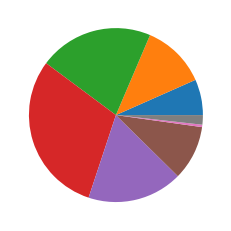

In [26]:
#2.3
plt.pie(df["matgras"].value_counts(sort=False))

<BarContainer object of 6 artists>

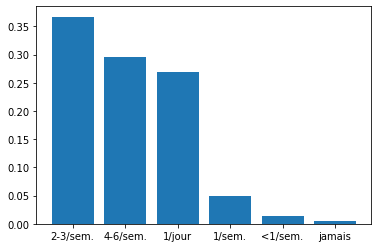

In [29]:
#2.4
tV = df['viande'].value_counts()/226
plt.bar(tV.index,tV)

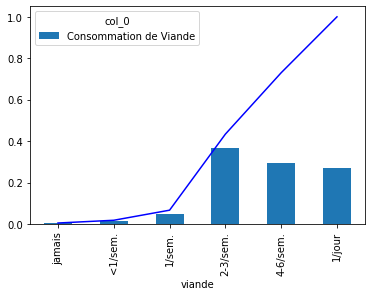

In [33]:
#2.5
tableViande=pan.crosstab(index=df["viande"],columns="Consommation de Viande",normalize=True)
tableViande.plot.bar()
plt.plot(tableViande.index,np.cumsum(tableViande),color='b')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


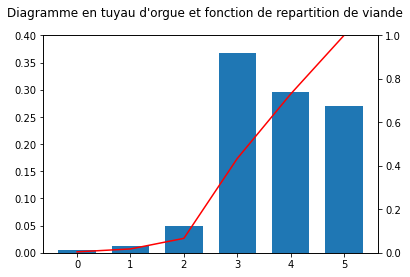

In [41]:
#2.6
tableViande=pan.crosstab(index = df["viande"],columns ="freq",normalize=True)
l=len(tableViande);x = np.arange(l);w=0.7
fig, ax = plt.subplots();ax.set_ylim(0,0.4)
ax.bar(x,np.reshape(tableViande.values,l), width=w)
ax2=ax.twinx()
ax2.set_ylim(0,1)
ax2.plot(x,tableViande.cumsum(),color='r')
fig.suptitle("Diagramme en tuyau d'orgue et fonction de repartition de viande")
ax.set_xticks(x)
ax.set_xticklabels(tableViande.index)
ax.legend(frameon=False)

<AxesSubplot:xlabel='cafe'>

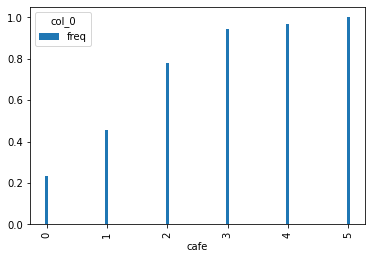

In [45]:
##3.1
tableCafe=pan.crosstab(index=df["cafe"],columns="freq",normalize=True).cumsum()
tableCafe.plot.bar(width=0.05)

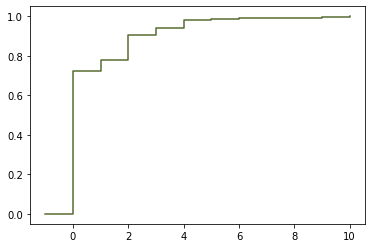

In [46]:
#3.2
tableThe=pan.crosstab(index = df["the"],columns="freq",normalize=True).cumsum()

xThe = np.array([-1,*(tableThe.index)])#abcisses aux valeurs et -1
val=np.reshape(tableThe.values,len(tableThe))#valeurs des frÃ©quences cumulÃ©es

figThe, axThe = plt.subplots();
axThe.step(xThe,np.array([0,*val]), where='post', color="#556b2f")#trace le diagramme en escalier en ajoutant un point de dÃ©part Ã  valeur 0 

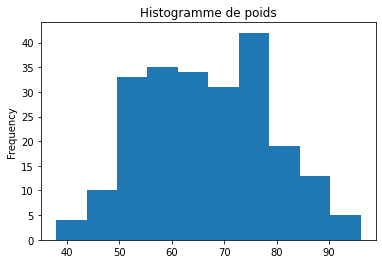

In [47]:
#3.3
plotPoids=df["poids"].plot.hist(title='Histogramme de poids')
plt.show(plotPoids)

(array([0.03539823, 0.0420354 , 0.06637168, 0.05973451, 0.07300885,
        0.05973451, 0.06637168, 0.02212389, 0.01769912, 0.01453856,
        0.00663717]),
 array([65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 90, 92]),
 <BarContainer object of 11 artists>)

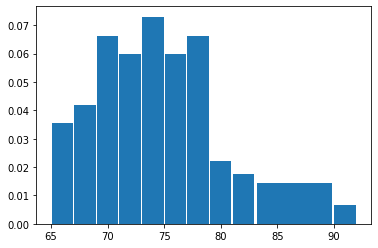

In [50]:
#3.4
figAge, axAge = plt.subplots()
axAge.hist(df["age"],[*(65+np.arange(10)*2),90,92],rwidth=0.95,density=True)

Text(0.5, 1.0, 'le poids en fonction de la taille')

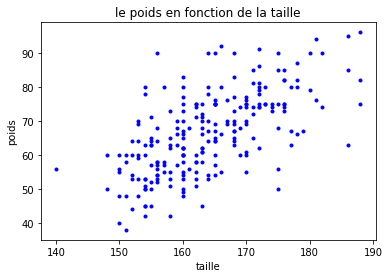

In [54]:
#3.5
plt.plot(df["taille"],df["poids"],'b.')
plt.ylabel("poids")
plt.xlabel("taille")
plt.title("le poids en fonction de la taille")

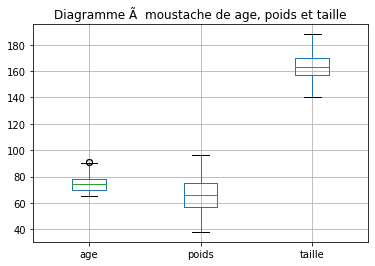

In [55]:
#3.6
box=df.boxplot(column=['age','poids','taille'])
box.set_title('Diagramme Ã  moustache de age, poids et taille')
plt.show(box)

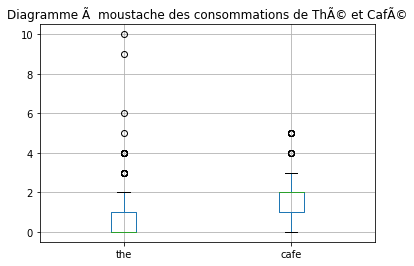

In [56]:
box2=df.boxplot(column=['the','cafe'])
box2.set_title('Diagramme Ã  moustache des consommations de ThÃ© et CafÃ©')
plt.show(box2)
#La consommation de thÃ© a beaucoup de valeurs extrÃªmes, une Ã©crasante majoritÃ© ne consomme jamais de thÃ© et la presque totalitÃ© au plus 1 ou 2, d'oÃ¹ une trÃ¨s forte assymÃ©trie de la Moustache
#La consommation de Cafe est beaucoup typique et similaire Ã  celle des variables continues avec peu de valeurs extrÃªmes.
#En tout cas, le diagramme Ã  moustache suffit Ã  montrer que les deux consommations sont qualitativement trÃ¨s diffÃ©rentes.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pan
import scipy.stats.mstats as ms
df=pan.read_csv("https://math.univ-lyon1.fr/~dabrowski/nutriage.csv",sep="\t")
Air=pan.read_csv("https://math.univ-lyon1.fr/~dabrowski/pollution.csv",sep="\t", na_values="-")

for nom in df.keys():
    globals()[nom] = df[nom]

In [29]:
x=np.array([1,8,5,1])
y=np.concatenate(([0],1+2*np.array(range(5))))
##autre solution
y=np.array([0,1,3,5,7,9])

In [30]:
   #1 
#erreur car x et y nâ€™ont pas mÃªme longueur.

<Figure size 432x288 with 0 Axes>

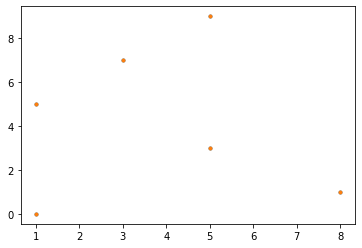

In [31]:
#3.2
x=np.concatenate((x,[3,5]))
plt.clf()
fig,ax=plt.subplots()
ax.plot(x,y,'.')
plt.plot(x,y,'.')

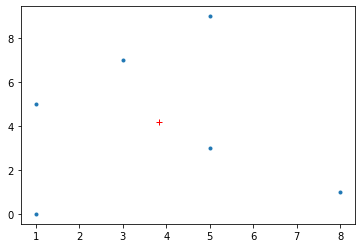

In [32]:
#3.3
fig,ax=plt.subplots()
ax.plot(x,y,'.')
ax.plot(np.mean(x),np.mean(y),'r+')

La droite de regression est y=-0.04977375565610855 x + 4.357466063348417


Text(0.5, 0.98, 'Droite de regression de y en fonction de x')

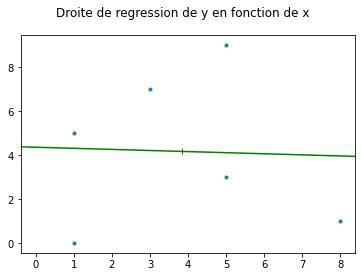

In [33]:
#3.4
a,b = ms.linregress(x,y)[:2]
print("La droite de regression est y=%s x + %s" %(a,b))
fig, ax = plt.subplots()
ax.plot(x,y,'.')
plt.plot(np.mean(x), np.mean(y), 'r+')
ax.axline(xy1=(0,b), slope = a, color='green')
fig.suptitle("Droite de regression de y en fonction de x")

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pan
import scipy.stats as st
from scipy.stats import bernoulli, binom, geom, poisson
import scipy.stats as st

In [35]:
### 3.1
N = 1000
U = st.uniform.rvs(1,6,size = N)
D = np.floor(U)
#print(U)
tab = pan.crosstab(D,columns = "freq",normalize = True)
print(tab)

col_0   freq
row_0       
1.0    0.159
2.0    0.181
3.0    0.178
4.0    0.145
5.0    0.175
6.0    0.162


<BarContainer object of 6 artists>

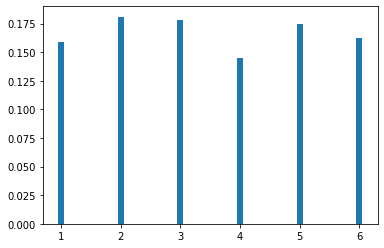

In [36]:
##3.1.2
plt.bar(tab.index, tab['freq'], width = 0.1)

<AxesSubplot:xlabel='row_0'>

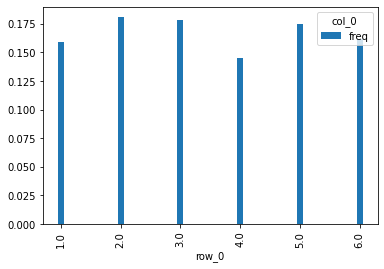

In [37]:
tab.plot.bar(width = 0.1)

In [38]:
#3.1.3 # On obtient une meilleure uniformité du dé.

In [39]:
#3.1.4
def Dice(f, N):
    U = st.uniform.rvs(1, f, size=N)
    D = np.floor(U)
    return(D)
pan.crosstab(Dice(8,10000),columns = 'freq',normalize=True)

col_0,freq
row_0,
1.0,0.1185
2.0,0.1270
3.0,0.1284
4.0,0.1192
5.0,0.1278
6.0,0.1271
7.0,0.1259
8.0,0.1261


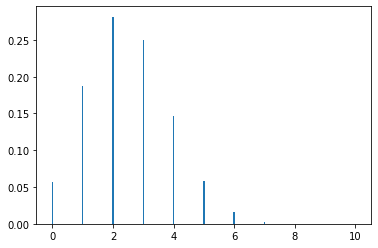

In [40]:
##3.3.1
n, p = 10, 0.25
ProbasB=binom.pmf(range(n+1),n,p)
plt.bar(range(n+1),ProbasB,width=0.05)
plt.show()

<BarContainer object of 11 artists>

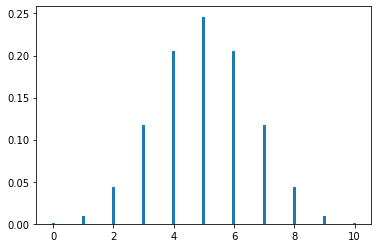

In [41]:
n, p = 10, 0.5
plt.bar(range(n+1),binom.pmf(range(n+1),n,p),width=0.1)

<BarContainer object of 11 artists>

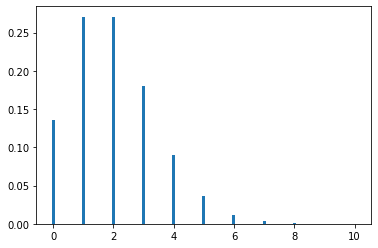

In [42]:
n = 10
plt.bar(range(n+1),poisson.pmf(range(n+1),2),width=0.1)

<BarContainer object of 11 artists>

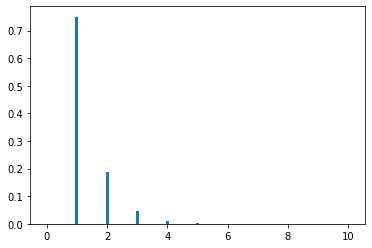

In [43]:
n, p = 10, 0.75
plt.bar(range(n+1),geom.pmf(range(n+1),p),width=0.1)

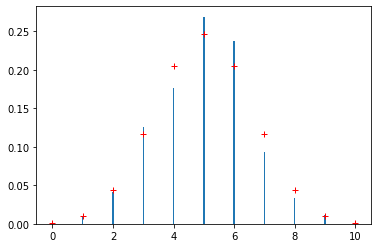

In [44]:
###3.3.2
n,p = 10, 0.5
b = binom.rvs(n,p,size =1000)
tab = pan.crosstab(b,columns='freq',normalize=True)
plt.bar(tab.index, tab['freq'],width = 0.05)
x = tab.index
plt.plot(x,binom.pmf(x,n,p),'r+')

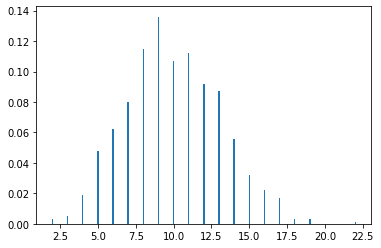

In [45]:
mu = 10
p = poisson.rvs(mu,size=1000)
tab = pan.crosstab(p,columns='freq',normalize=True)
plt.bar(tab.index,tab['freq'],width=0.1)
x = tab.index

Text(0.5, 1.0, 'Convergence vers la loi de Poisson')

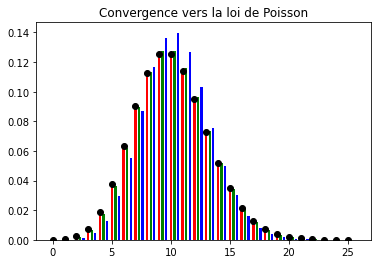

In [55]:
n = 25
x = np.arange(n+1)
plt.bar(x+0.6,binom.pmf(x,50,0.2),width=0.2, color='blue')
plt.bar(x+0.3,binom.pmf(x,250,0.04),width=0.2, color='green')
plt.bar(x,binom.pmf(x,500,0.02),width=0.2, color='red')
plt.plot(x,poisson.pmf(x,10),'o',color="black")
plt.title("Convergence vers la loi de Poisson")

In [61]:
import numpy as np; 
import matplotlib.pyplot as plt; 
import scipy.stats as st

In [67]:
##4.1.1
N=2000
X=st.binom.rvs(1,0.5,size = N)
print(x)

[0 1 1 ... 0 1 0]


In [68]:
#4.1.2
# Y_n converge vers E(X_1)=p=0.5 avec probabilite 1
#(cette convergence est dite presque sure)

In [73]:
Y=np.cumsum(X)/(1+np.arange(N))
print(y)

[1.         1.         0.66666667 ... 0.48248248 0.48274137 0.483     ]


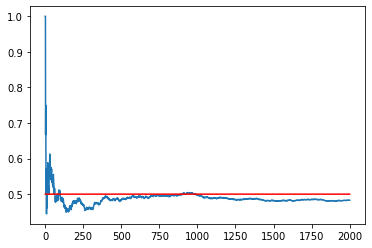

In [75]:
plt.plot(np.arange(1,N+1),Y)
plt.plot(np.arange(1,N+1), np.repeat(0.5,N), color='red')